# First attempt to make a model

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.linalg as sc
import numpy.linalg as lin

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
students=20

In [4]:
print('hello world to ', students)

hello world to  20


In [5]:
print(f'hello world to {students} and {students+1}')

hello world to 20 and 21


In [6]:
import math as mt

In [7]:
mt.pi

3.141592653589793

In [8]:
a = 2.5
b = 4
a**b 

39.0625

In [9]:
x = np.linspace(-2*mt.pi,2*mt.pi,1000)
y = np.sin(x)

In [10]:
fmtplot = {'linestyle':'--','linewidth':2.5,'color':'navajowhite'}
mtplot = {'linestyle':'-.','linewidth':2.5,'color':'green'}

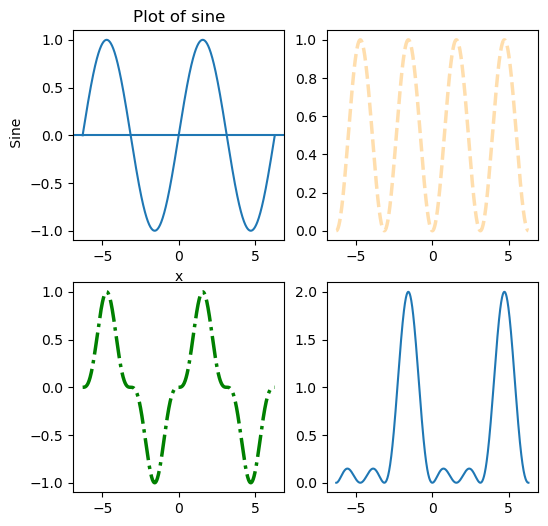

In [11]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2, 2, 1)
ax.plot(x,y)
ax.set_title('Plot of sine')
ax.set_xlabel('x')
ax.set_ylabel(' Sine')
ax.axhline(0.0)
ax = fig.add_subplot(2, 2, 2)
ax.plot(x,y**2,**fmtplot)
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(x,y**3,**mtplot)
ax = fig.add_subplot(2, 2, 4)
ax.plot(x,y**2-y**3)
plt.show()

In [12]:
import math
import numpy.fft as nf
import scipy as sci

def spekdel2(spek,KX,KY):
    kzx = KX.copy()
    kzy = KY.copy()
    kzx[:,0] = 0.0
    kzy[0,:] = 0.0
    return (kzx**2+kzy**2)*spek
def spekdel4(spek,KX,KY):
    kzx = KX.copy()
    kzy = KY.copy()
    kzx[:,0] = 0.0
    kzy[0,:] = 0.0
    return (kzx**4+kzy**4)*spek
def invspekdel2(spek,KX,KY):
    temp = -spek/(KX**2+KY**2)
    temp[0,0] = 0.0
    return temp
def uspek(spek,kx,ky):
    kaz = ky.copy()
    kaz[0,:] = 0.0
    temp = -1j*kaz*spek

    return temp
def vspek(spek,KX,KY):
    kaz = KX.copy()
    kaz[:,0] = 0.0
    temp = 1j*kaz*spek
    return temp

def trunc(spek,Nt):
    ''' Truncate spectral coeff at Nt'''
    temp = spek.copy()
    temp[0:Nt,:-Nt] = 0.0
    return temp

def plot_model(g_vor,g_u,g_v, g_str, timestep):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(2,2,1)
    h1=ax.contourf(g_vor.real)
    ax.set_title(f'Vorticity at time step {timestep}')
    fig.colorbar(h1)
    ax = fig.add_subplot(2,2,2)
    h2=ax.contourf(g_u.real)
    ax.set_title('U Wind')
    fig.colorbar(h2)
    ax = fig.add_subplot(2,2,3)
    h3=ax.contourf(g_v.real)
    ax.set_title('V Wind')
    fig.colorbar(h3)
    ax = fig.add_subplot(2,2,4)
    h4=ax.contourf(g_str.real)
    ax.set_title('Streamfunction')
    fig.colorbar(h4)
    plt.show()

    skip = 6
    fig2=plt.figure(figsize=(6,6))
    ax = fig2.add_subplot(1,1,1)
    ax.quiver(g_u[::skip,::skip],g_v[::skip,::skip],angles='xy')
    ax.set_title(' Velocity Field')
    plt.show()
    return

Grid size = 78.74015748031496 km


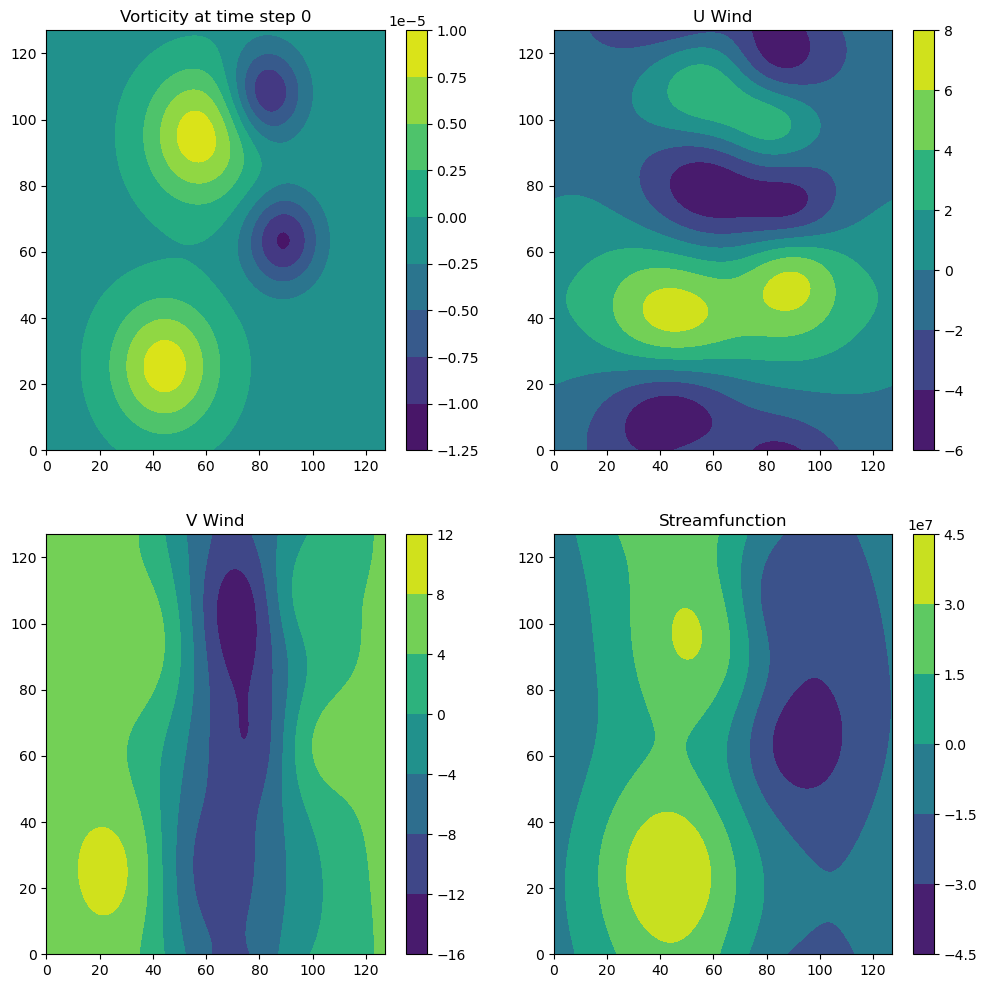

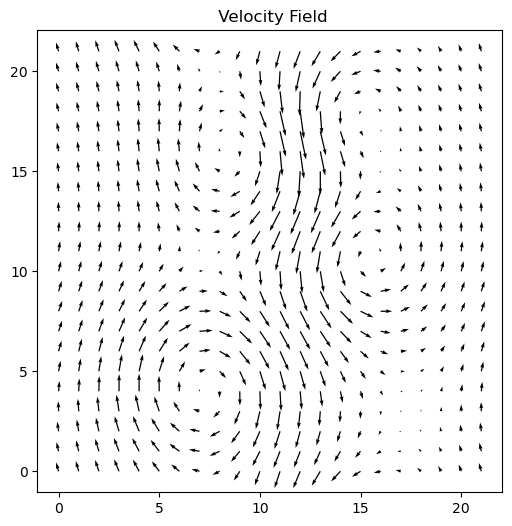

In [58]:
km = 1e+3
Lx = 10000*km
Ly = 10000*km
Npoints = 128
Ntrunc = 10
beta = 1e-11
deltat = 900

# Grid data
deltax = Lx/(Npoints-1)
print(f'Grid size = {deltax/km} km')
# Wavenumbers
x = np.linspace(-Lx,Lx,Npoints)
y = np.linspace(-Ly,Ly,Npoints)
xp, yp = np.meshgrid(x, y,  indexing='xy')

kx = 2*math.pi*nf.fftfreq(len(x), (x[1]-x[0])/Lx)
ky = 2*math.pi*nf.fftfreq(len(x), (y[1]-y[0])/Ly)

kx[0]=ky[0]=0
KX, KY = np.meshgrid(kx/Lx, ky/Ly,  indexing='xy')

kx[0]=ky[0]=1
KXu, KYu = np.meshgrid(kx/Lx, ky/Ly,  indexing='xy')


# Frequency are used only in derivatives

#IC
vor0 = np.exp(-(((xp-4000*km)/Lx)**2+(yp/Ly)**2)/0.05)*1e-5 -  np.exp(-(((xp+3000*km)/Lx)**2+((yp+6000*km)/Ly)**2)/0.1)*1e-5 
vor0 = vor0 + np.exp(-(((xp-3000*km)/Lx)**2+((yp-7000*km)/Ly)**2)/0.05)*1e-5 -  np.exp(-(((xp+1000*km)/Lx)**2+((yp-5000*km)/Ly)**2)/0.1)*1e-5
s_vor0 = nf.fft2(vor0)
s_str0 = invspekdel2(s_vor0,KXu,KYu)

# plt.contourf(xic,yic,vor0)
# plt.show()


s_vor0 = spekdel2(s_str0,KX,KY)
s_u0 = uspek(s_str0,KX,KY)
s_v0 = vspek(s_str0,KX,KY)

g_vor0 = nf.ifft2(s_vor0).real
g_u0 = nf.ifft2(s_u0).real
g_v0 = nf.ifft2(s_v0).real
g_str0 = nf.ifft2(s_str0).real

plot_model(g_vor0,g_u0,g_v0, g_str0, 0)

In [59]:
s_vor = s_vor0.copy()
s_u = s_u0
s_v = s_v0

r= 1./(240*86400.)
Kd4 = 5.0e+11
Kd2 = -5.0e+6

#Forcing
kfor = 24
s_for = s_vor0.copy()
s_for[:,:] = 0.0
s_for[kfor,kfor] = 5.0e-09


Nstep=4000
Nplot = 500


In [60]:
g_vor = nf.ifft2(s_vor).real
g_u = nf.ifft2(s_u0).real
g_v = nf.ifft2(s_v0).real

ens0 = np.sum(g_vor**2)
en0 = np.sum(g_u**2+g_v**2)

In [61]:
s_A = nf.fft(g_vor*g_u)
s_B = nf.fft(g_vor*g_v)

vordt = 1j*KX*s_A +1j*KY*s_B - beta*s_v 
s_vor = s_vor0.copy() + deltat*vordt
s_vorm = s_vor0.copy()

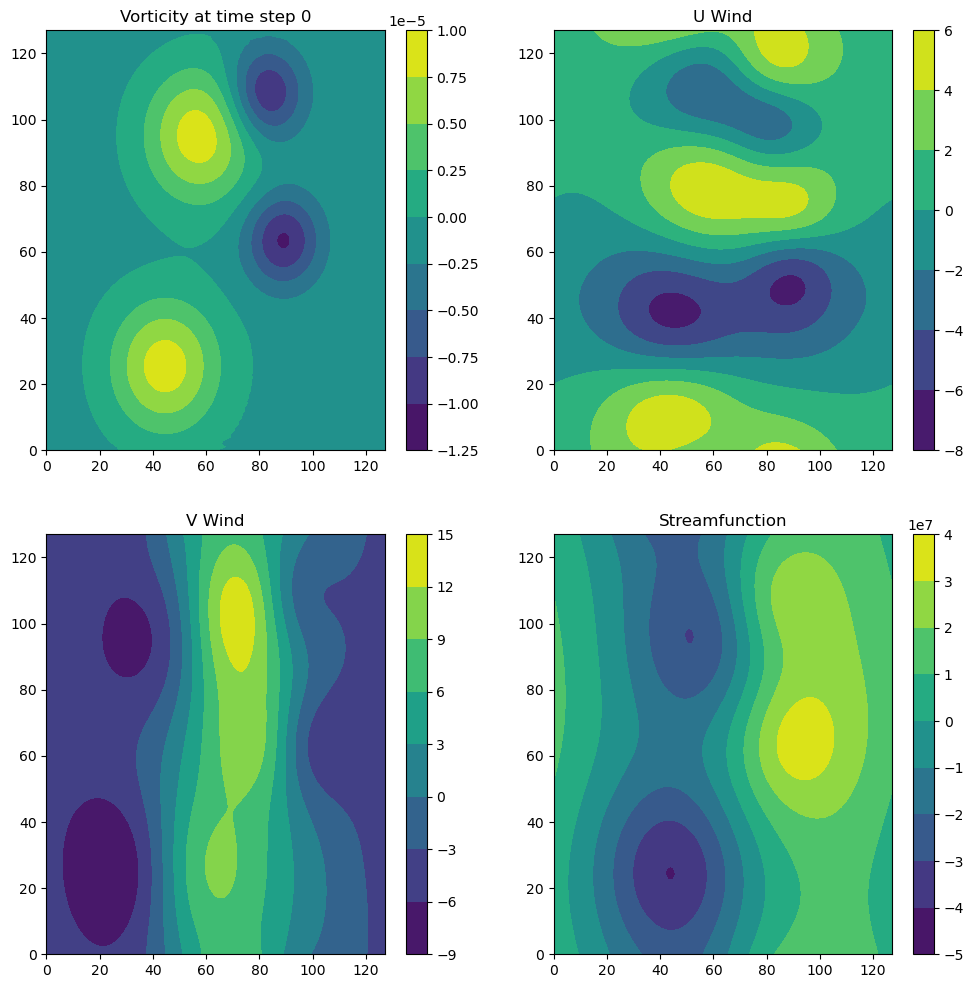

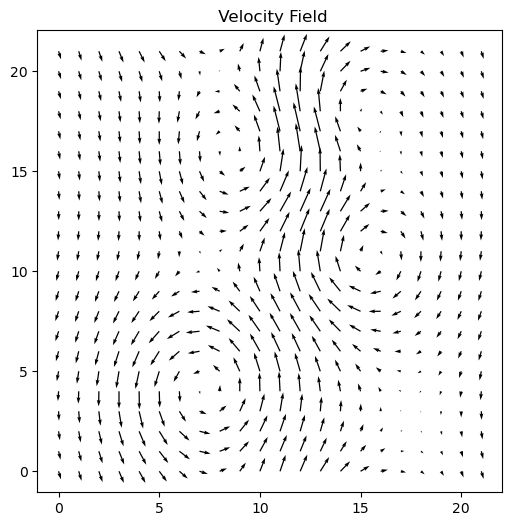

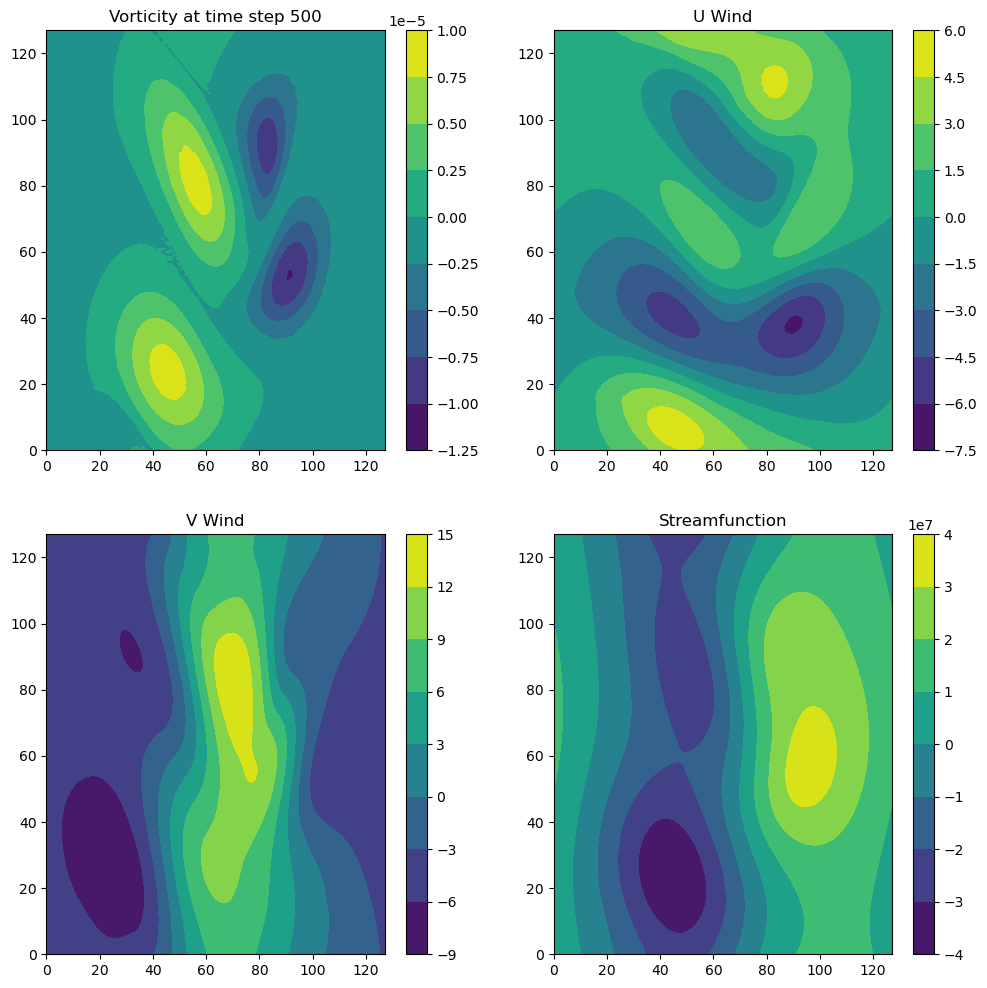

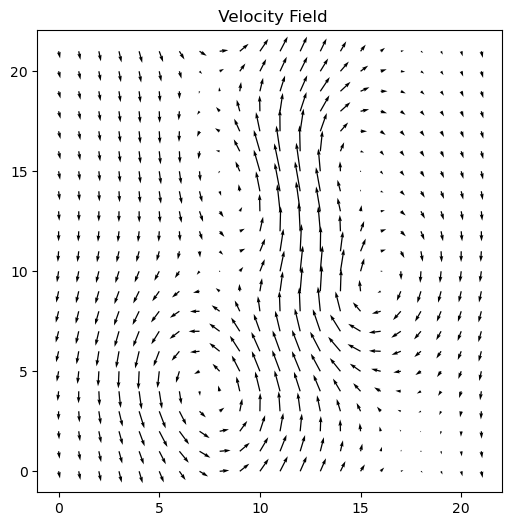

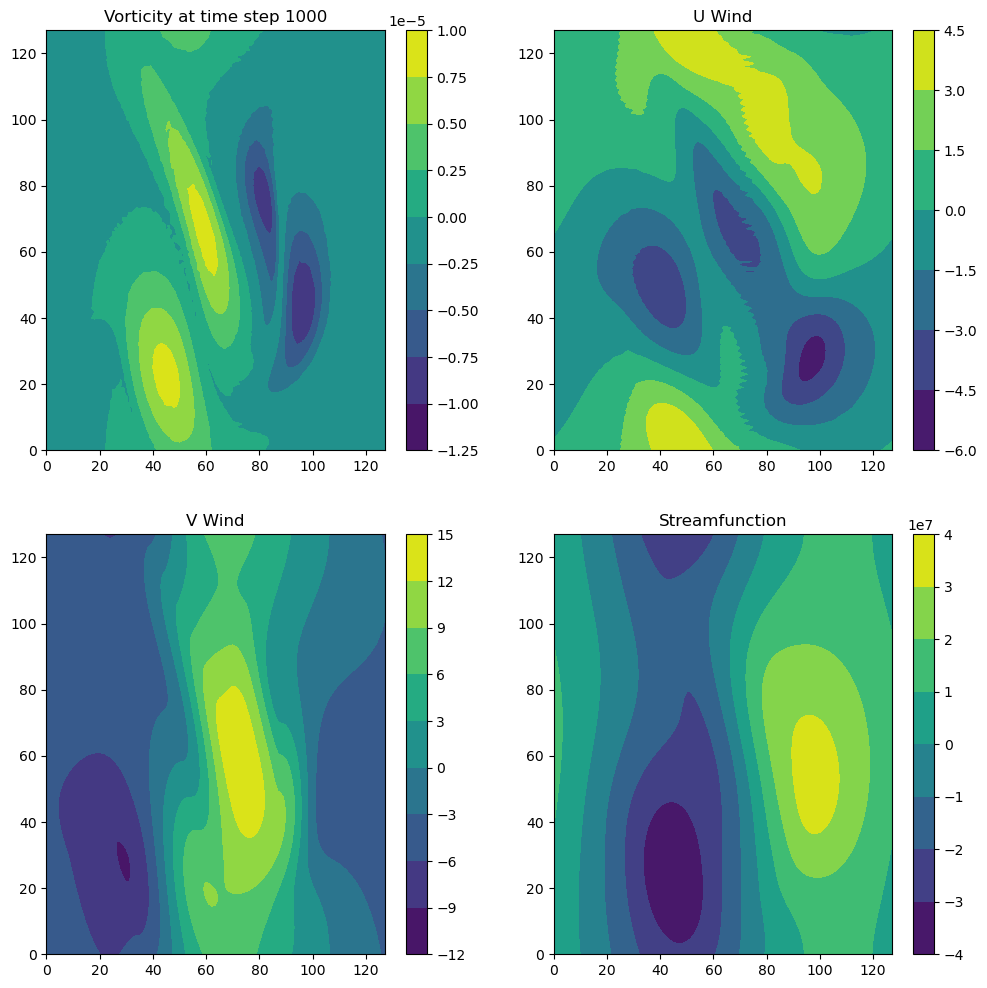

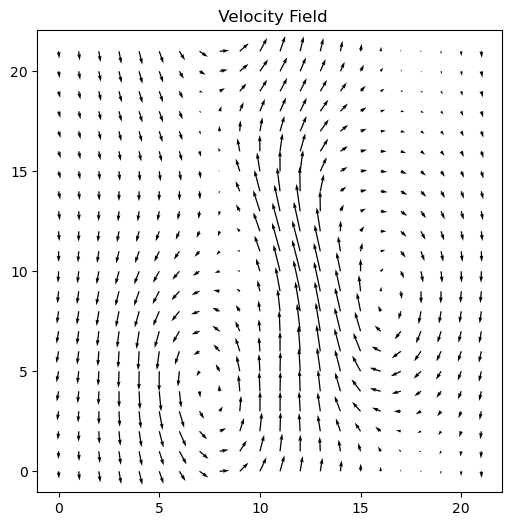

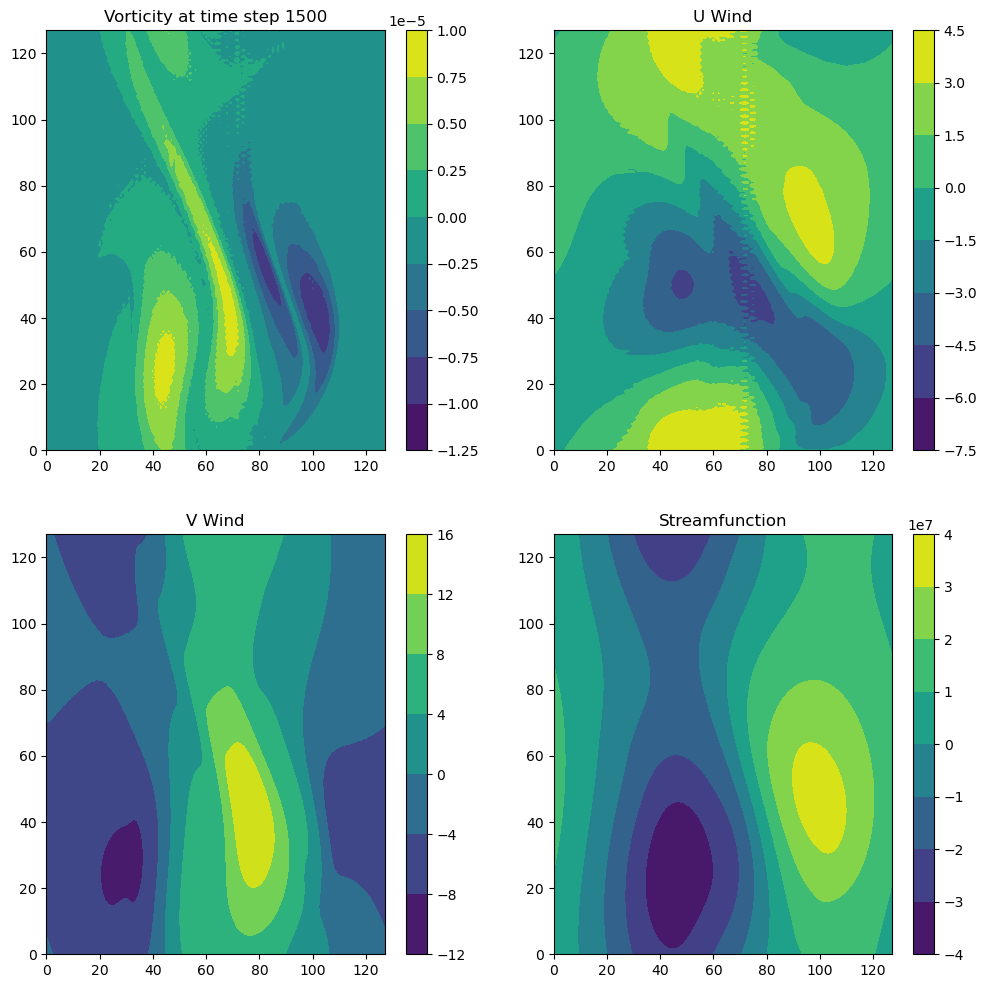

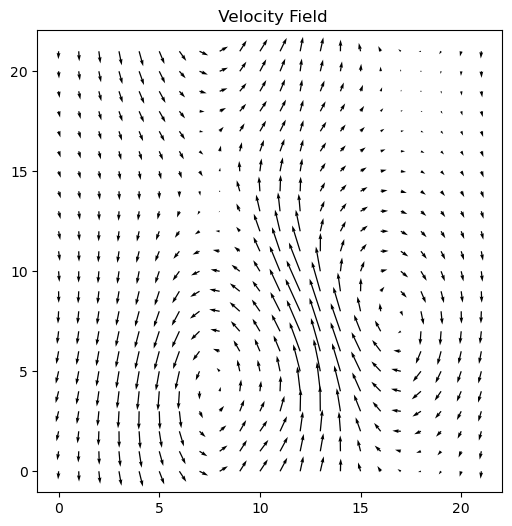

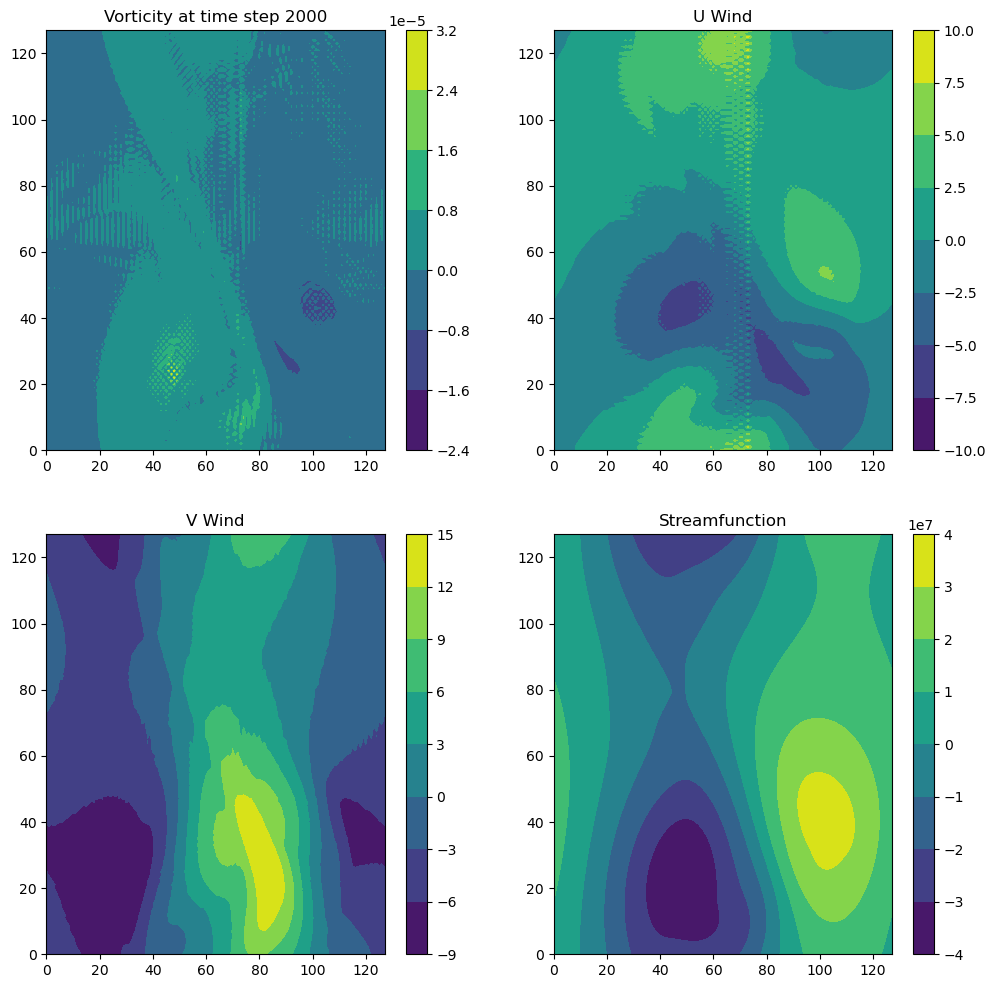

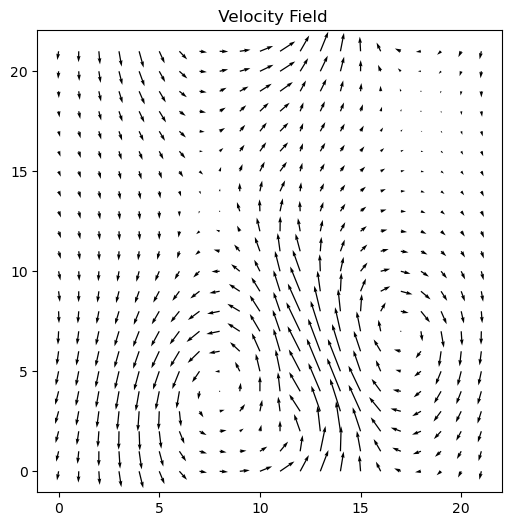

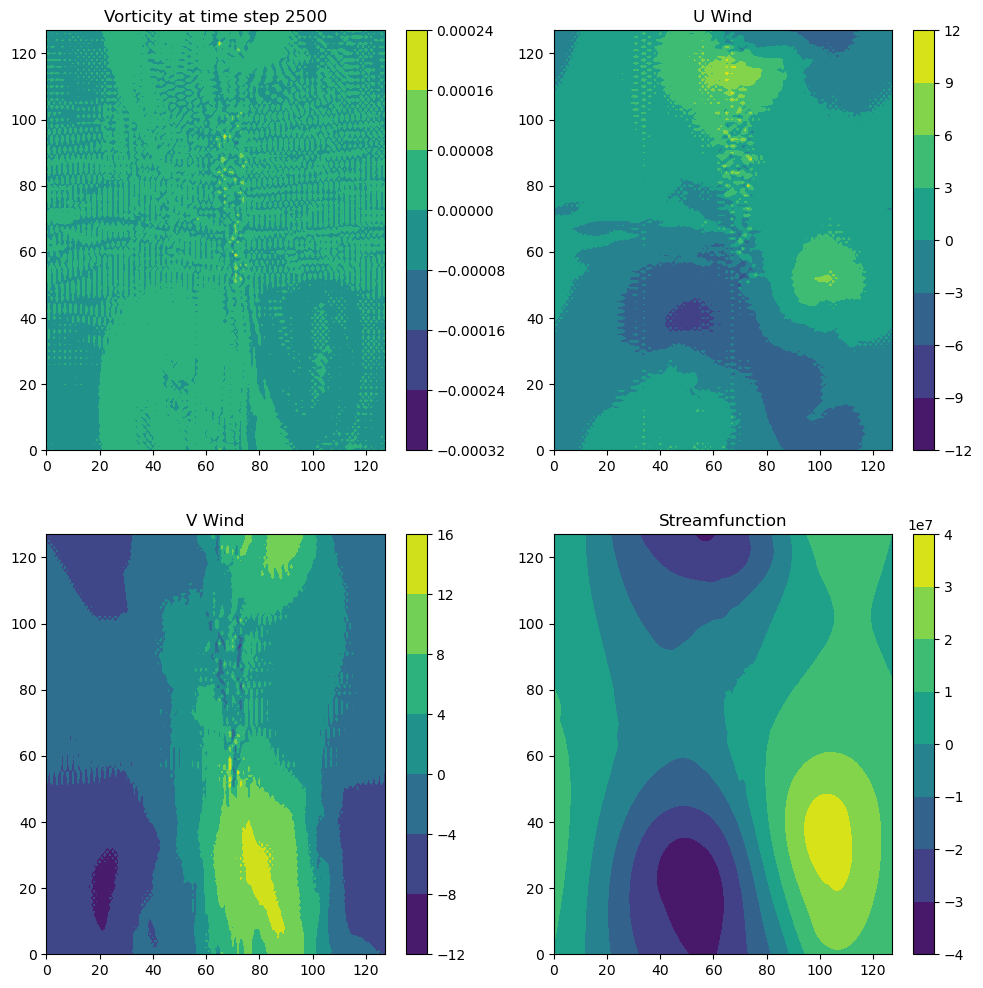

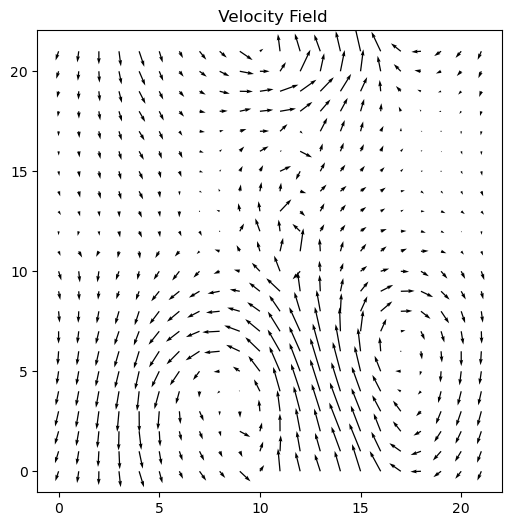

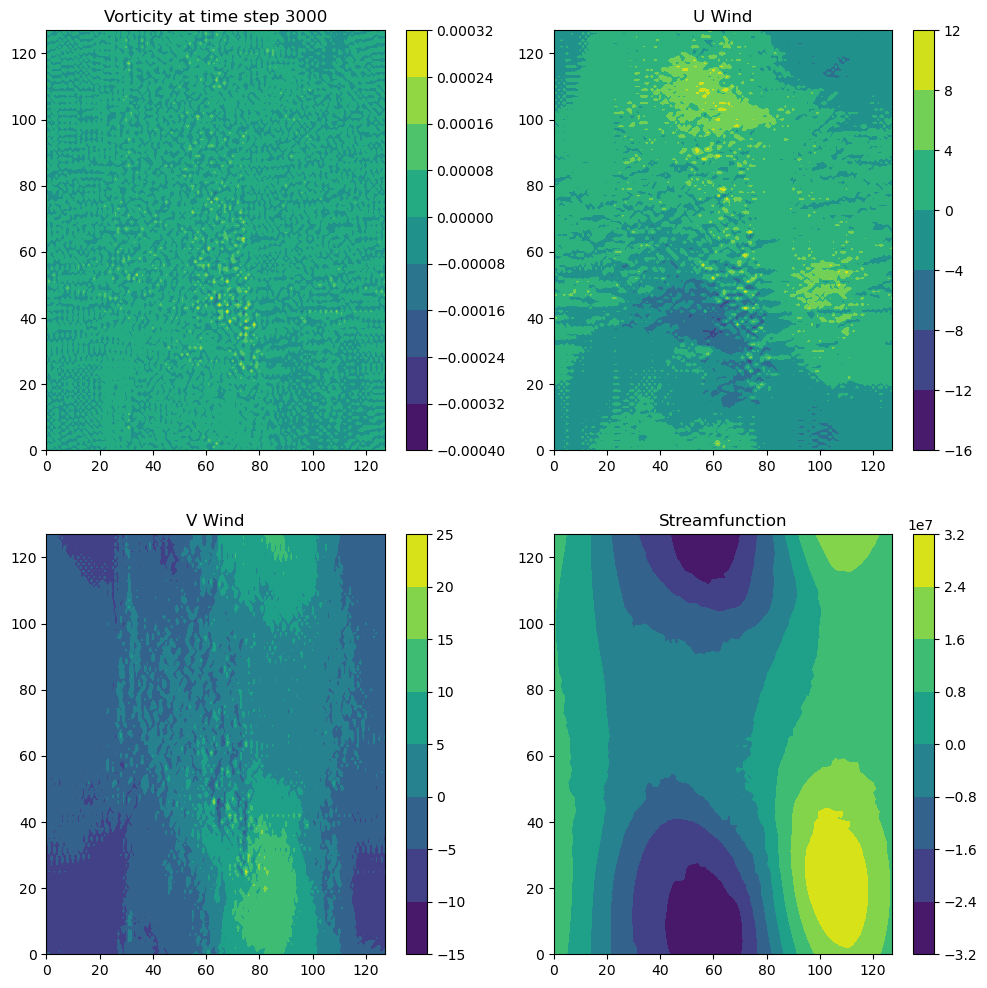

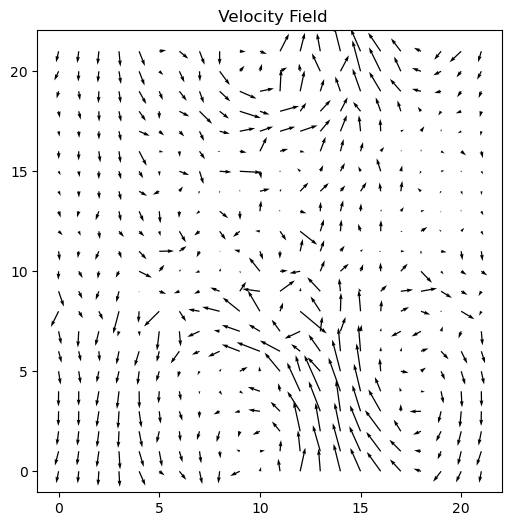

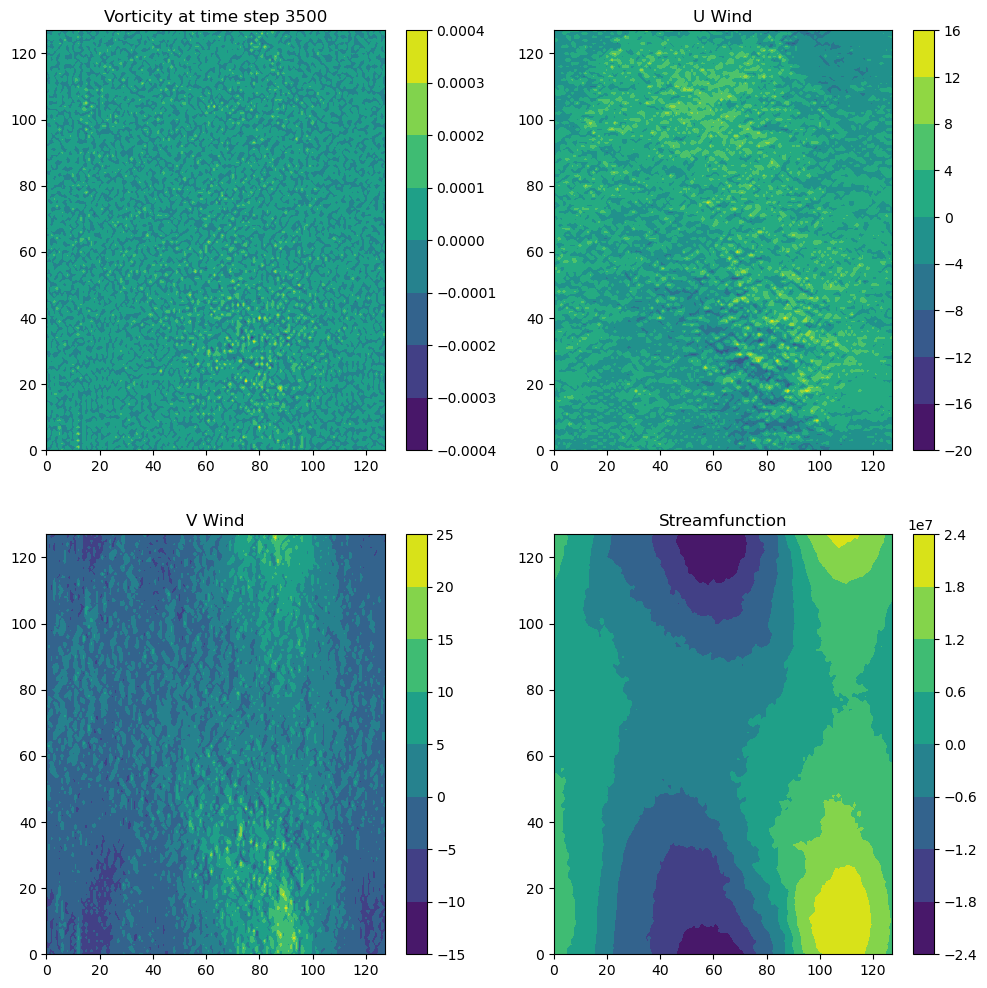

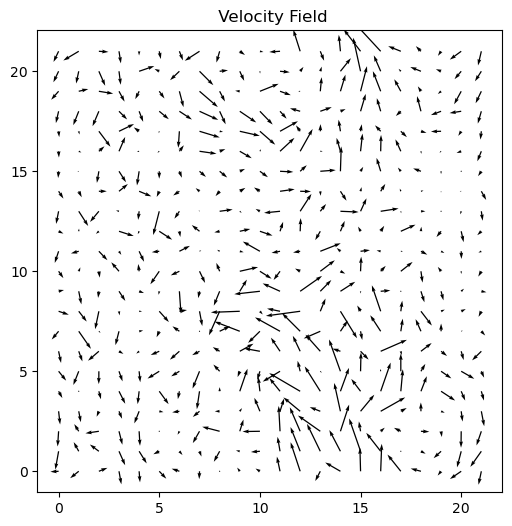

CPU times: user 15.6 s, sys: 286 ms, total: 15.9 s
Wall time: 7.94 s


In [62]:
%%time
enstrophy = np.ones(Nstep)
energy = np.ones(Nstep)
ek = np.zeros(s_vor0.shape,'complex')
nalias = Npoints#int(Npoints*3/2)

for i in range(Nstep):
    s_str = invspekdel2(s_vor,KXu,KYu)
    s_u = uspek(s_str,KX,KY)
    s_v = vspek(s_str,KX,KY)

    g_vor = nf.ifft2(s_vor, s=[nalias,nalias]).real
    g_u = nf.ifft2(s_u,s=[nalias,nalias]).real
    g_v = nf.ifft2(s_v,s=[nalias,nalias]).real
    
   
    s_A = nf.fft2(g_vor*g_u)
    s_B = nf.fft2(g_vor*g_v)
    
    #Eliminate aliaased modes
    s_A = trunc(s_A,Npoints)
    s_B = trunc(s_B,Npoints)
    
    # vordt = 1j*KX*s_A +1j*KY*s_B - beta*s_v - r*s_vorm - Kd4*spekdel4(s_vorm,KX,KY) +Fv
    vordt = 1j*KX*s_A +1j*KY*s_B - r*s_vorm - Kd4*spekdel4(s_vorm,KX,KY) + s_for
    
    s_vornp_temp = s_vorm + 2*deltat*vordt
    enstrophy[i] = np.sum(g_vor**2)
    energy[i] = np.sum(g_u**2+g_v**2)
    
    if Nstep > 100:
        ek += nf.fft2(g_u**2+g_v**2,s=[Npoints,Npoints])
    
    #Robert filter
    s_vornp = s_vornp_temp*0.97 + s_vor*0.03 
    
    s_vorm = s_vor.copy()
    s_vor = s_vornp.copy()
    
    if i%Nplot == 0:
        plot_model(g_vor,g_u,g_v, nf.ifft2(s_str,s=[nalias,nalias]), i)

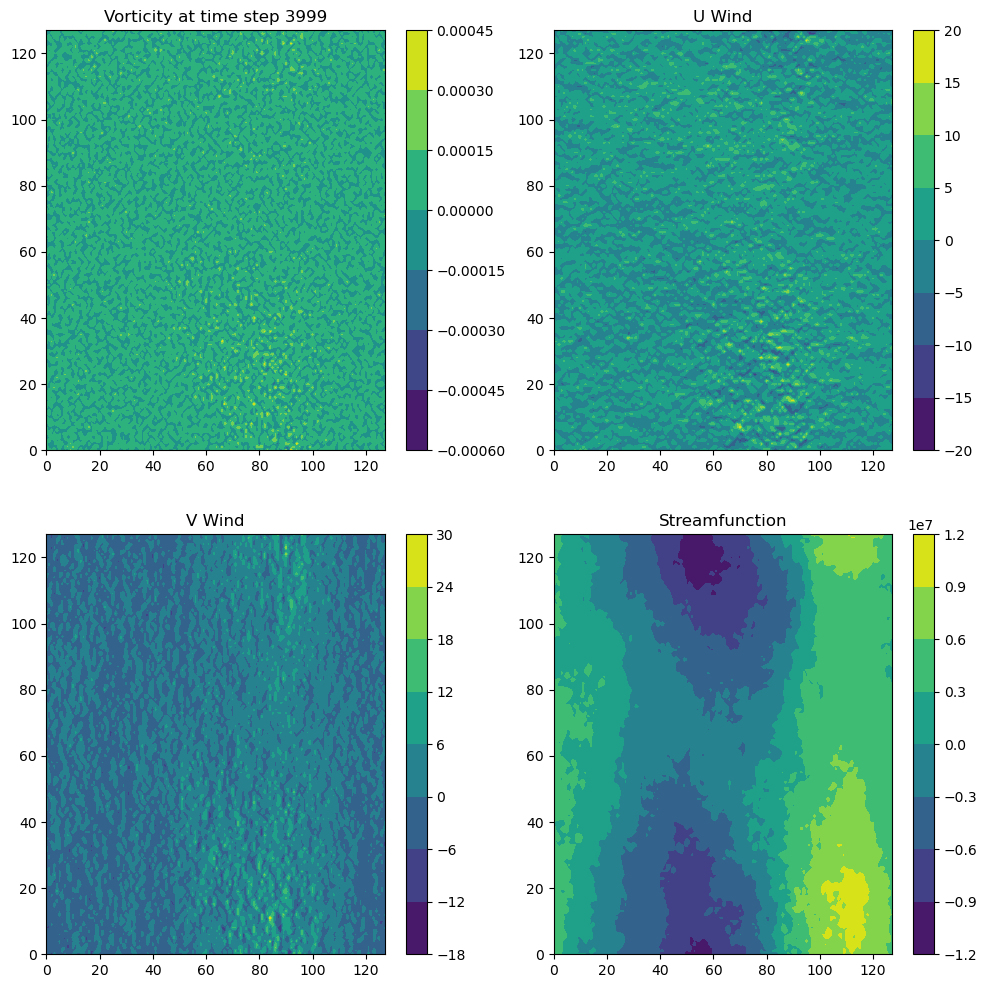

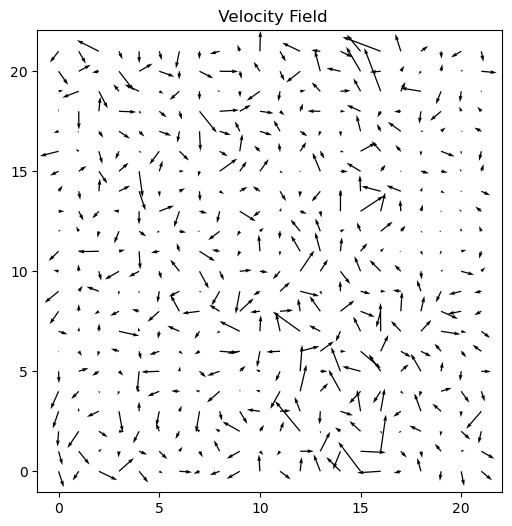

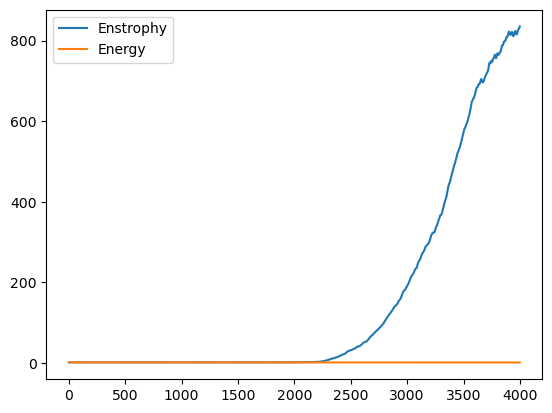

In [63]:


   
plot_model(g_vor,g_u,g_v, nf.ifft2(s_str), i)

plt.plot(enstrophy/ens0,label='Enstrophy')
plt.plot(energy/en0,label='Energy')
plt.legend()
plt.show()

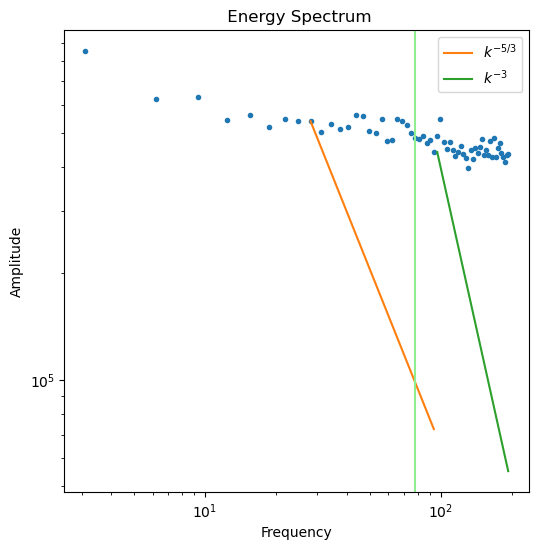

In [64]:
nx,ny = s_vor.shape
in3 = int(30)
in53 = 8
in53end = int(30)
sek = nf.fft2(g_u**2+g_v**2)
spv = np.sum(abs(sek),axis=1)

ncut = int((nx-1)/2)
freq= kx[1:ncut]
k53 = freq**(-5./3.)/(freq[in53]**(-5./3))*spv[in53]
k3 = freq**(-3.)/(freq[in3]**(-3))*spv[in3]
fig3=plt.figure(figsize=(6,6))
ax = fig3.add_subplot(1,1,1)
ax.loglog(freq,spv[1:ncut],'.')
ax.loglog(freq[in53:in53end],k53[in53:in53end],label=r'$k^{-5/3}$')
ax.loglog(freq[in3:ncut],k3[in3:ncut],label=r'$k^{-3}$')
ax.axvline(freq[24],color='lightgreen')
ax.set_title(' Energy Spectrum')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
plt.legend()
plt.show()
